### Initialization of pandas dataframe

In [59]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

original_df = pd.read_csv("raw_data.csv")
original_df = original_df.drop(columns=['index'])

### Dropping Palawan rows since suspicious yung data nila

In [60]:
df = original_df[original_df['crop'] != 'PALAWAN, YELLOW, 1 KG']

In [89]:
df['category'].unique()

array(['CEREALS', 'ROOTCROPS', 'BEANS & LEGUMES', 'CONDIMENTS',
       'FRUIT VEGETABLES', 'LEAFY VEGETABLES', 'FRUITS',
       'COMMERCIAL CROPS', 'LIVESTOCK', 'POULTRY', 'FISH'], dtype=object)

### Prepare Crop Combinations

In [124]:
from itertools import combinations
import numpy as np

# unique_categories = df['category'].unique()
# print(unique_categories)

# unique_crops = df.query("category == 'FISH'")
# unique_crops = unique_crops['crop'].unique()
# unique_crops = np.append("RICE, WELL-MILLED, 1 KG", unique_crops)

# print(unique_crops)
#unique_crops = df['crop'].unique()

unique_crops = ["RICE, WELL-MILLED, 1 KG",
                "WHOLE CORN GRAIN, YELLOW, 1 KG",
                "POTATO, 1 KG",
                "RAW PEANUT, SHELLED, 1 KG",
                "GINGER, LOOSE, 1 KG",
                "CHAYOTE, 1 KG",
                "CAMOTE TOPS, 1 KG",
                "FRESH FRUIT, BANANA, SABA, MEDIUM, 1 KG",
                "YOUNG COCONUT, MEDIUM, 1 PC",
                "FRESH BEEF, PURE MEAT, 1 KG",
                "FRESH EGG, CHICKEN, NATIVE, MEDIUM, 1 PC",
                "FRESH CHICKEN, NATIVE, 1 KG",
                "FRESH SHRIMP, SUAJE (DARK GREEN), MEDIUM, 1 KG",
                "FRESH FISH, TILAPIA, MEDIUM, 1 KG",
                "FRESH SHRIMP, ACETES, MEDIUM, 1 KG"
            ]

crop_pairs = list(combinations(unique_crops, 2))
correlation_results = {}

### Compute Pearson correlation between the prices of the two crops

In [127]:
# Loop through each crop pair
for crop1, crop2 in crop_pairs:
    # Select data for the first crop
    
    # ###########################RICE ONLY FOR CROP 1################################
    # if crop1 != 'RICE, WELL-MILLED, 1 KG':
    #     continue
    # ###########################RICE ONLY FOR CROP 1################################
    
    crop1_data = df[df['crop'] == crop1]
    
    # Select data for the second crop
    crop2_data = df[df['crop'] == crop2]
    
    # if crop1_data['category'].unique() == crop2_data['category'].unique():
    #     continue
    
    # Merge data for the two crops based on 'year' and 'month'
    merged_data = pd.merge(crop1_data, crop2_data, on=['year', 'month'])
    
    # Compute Pearson correlation between the prices of the two crops
    correlation = merged_data['price_x'].corr(merged_data['price_y'])
    
    # Store the correlation coefficient in the dictionary
    correlation_results[(crop1, crop2)] = correlation

# Convert dictionary to DataFrame for easier analysis
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['Pearson Correlation'])

### Create a correlation matrix

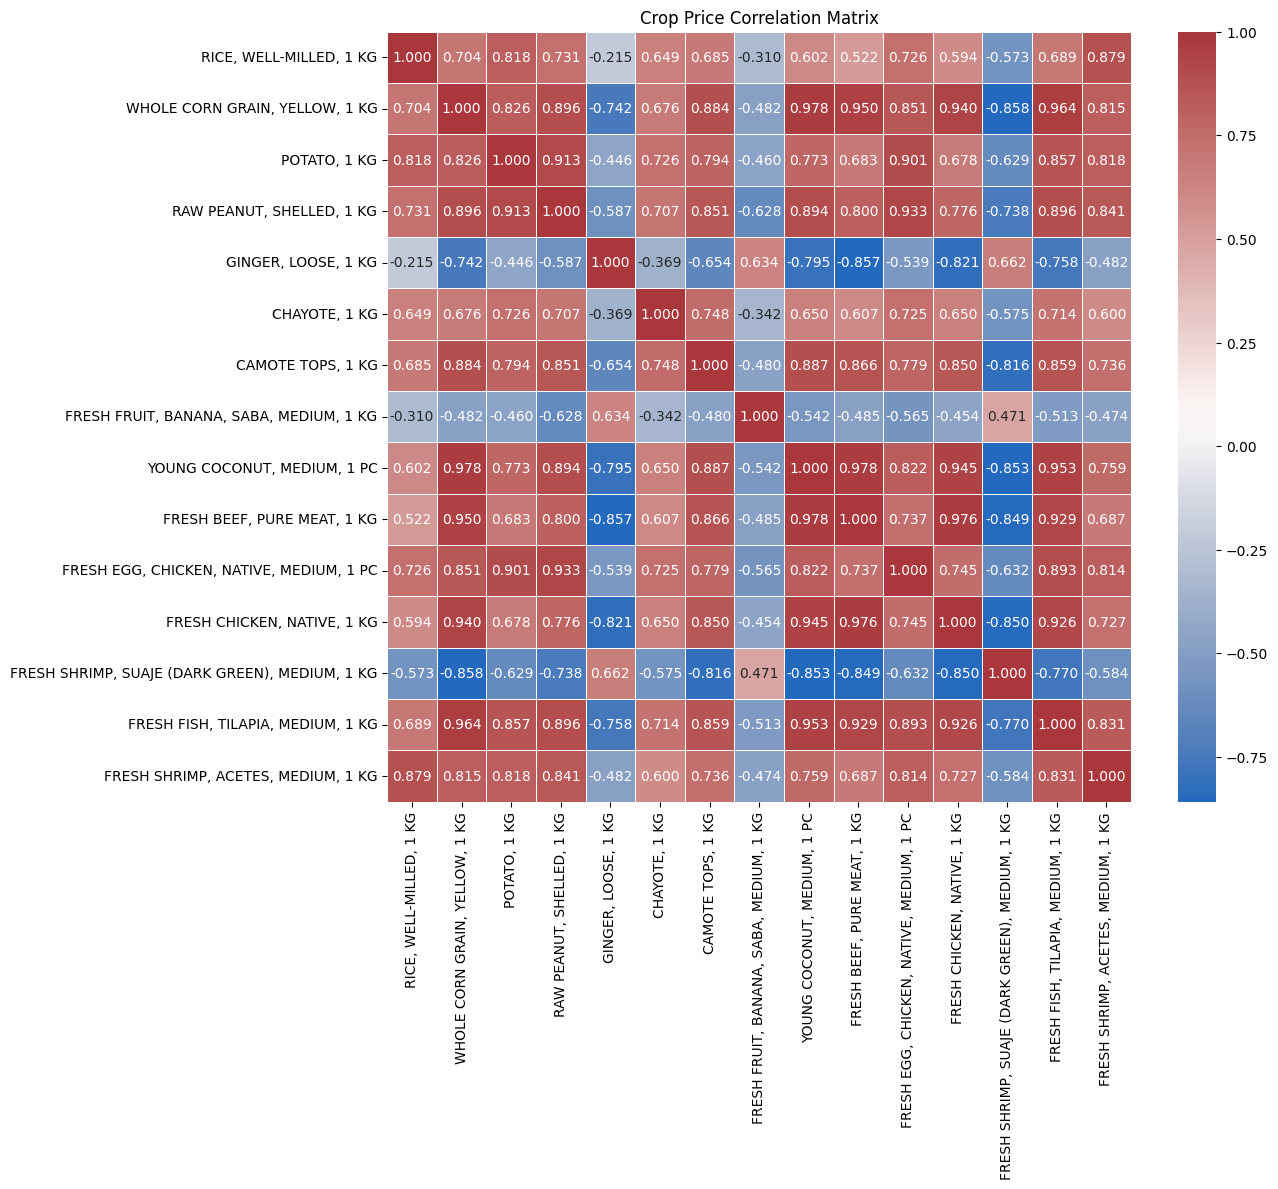

In [128]:
correlation_matrix = pd.DataFrame(index=unique_crops, columns=unique_crops)

# Fill in the correlation matrix
for (crop1, crop2), correlation in correlation_results.items():
    correlation_matrix.at[crop1, crop2] = correlation
    correlation_matrix.at[crop2, crop1] = correlation

# Ensure diagonal values are 1 (self-correlation)
for crop in unique_crops:
    correlation_matrix.at[crop, crop] = 1

# Optionally, visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='vlag', linewidths=0.5, fmt=".3f")
plt.title('Crop Price Correlation Matrix')
plt.show()

### Print correlations

In [123]:
sorted_correlation_df = correlation_df.sort_values(by='Pearson Correlation', ascending=False)

# Display the top 10 correlations
print("Top correlations:")
sorted_correlation_df.head(20)

Top correlations:


,Pearson Correlation
"(RICE, WELL-MILLED, 1 KG, FRESH SHRIMP, ACETES, MEDIUM, 1 KG)",0.879090
"(RICE, WELL-MILLED, 1 KG, FRESH FISH, TILAPIA, MEDIUM, 1 KG)",0.688643
"(RICE, WELL-MILLED, 1 KG, FRESH SEAWEEDS, LATO, 1 KG)",0.612636
"(RICE, WELL-MILLED, 1 KG, FRESH SEAWEEDS, GULAMAN DAGAT, 1 KG)",0.590655
"(RICE, WELL-MILLED, 1 KG, FRESH FISH, TALAKITOK (MAMSA), MEDIUM, 1 KG)",0.584565
"(RICE, WELL-MILLED, 1 KG, FRESH SQUID, LOKOS, MEDIUM, 1 KG)",0.557024
"(RICE, WELL-MILLED, 1 KG, FRESH FISH, SLIPMOUTH, SAPSAP, MEDIUM, 1 KG)",0.539253
"(RICE, WELL-MILLED, 1 KG, FRESH FISH, SNAPPER, MAYA-MAYA, MEDIUM, 1 KG)",0.537621
"(RICE, WELL-MILLED, 1 KG, FRESH FISH, SARDINE, TAMBAN, MEDIUM, 1 KG)",0.519330
"(RICE, WELL-MILLED, 1 KG, FRESH FISH, MILKFISH, BANGUS, MEDIUM, 1 KG)",0.513058
